# Task 3: Forecast Future Market Trends

## Objective
Use trained models to forecast Tesla's future stock prices and analyze the results.

## Steps
1. Generate Future Forecasts (6-12 months).
2. Visualize with Confidence Intervals.
3. Perform Trend Analysis.
4. Assess Market Opportunities and Risks.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pmdarima as pm
import importlib

# Add src to path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

import models
importlib.reload(models)

from data_loader import fetch_data, clean_data
from models import train_test_split_series, fit_arima_model, forecast_and_evaluate
from forecasting import generate_future_forecast_arima, plot_forecast

# Load Data
data_path = "../data/processed/historical_data.csv"
if os.path.exists(data_path):
    data = pd.read_csv(data_path, index_col=0, parse_dates=True, header=[0, 1])
else:
    # Fetch if not exists
    assets = ['TSLA', 'BND', 'SPY']
    data = clean_data(fetch_data(assets, '2015-01-01', '2026-01-15'))

try:
    tsla_close = data['TSLA']['Close']
except:
    tsla_close = data['TSLA']
tsla_close.dropna(inplace=True)

# Train/Test Split
# We split the data to evaluate the model's performance on recent historical data
split_date = '2025-01-01'
train, test = train_test_split_series(tsla_close, split_date)

# Train ARIMA on the training portion
# Use fit_arima_model from models.py which now includes the dynamic/random-walk fix
model_fit = fit_arima_model(train, seasonal=True, m=5)
print(model_fit.summary())

2026-01-28 15:59:02.943225: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-28 15:59:02.949598: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-28 15:59:03.224152: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-28 15:59:04.179934: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

Train shape: (2516,)
Test shape: (259,)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2516
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -8165.758
Date:                Wed, 28 Jan 2026   AIC                          16345.516
Time:                        16:00:18   BIC                          16386.326
Sample:                             0   HQIC                         16360.327
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4480      0.458      0.978      0.328      -0.450       1.346
ar.L1         -1.6779      0.015   -109.102      0.000      -1.708      -1.648
ar.L2       

## 1. Generate Future Forecasts (12 Months)
Forecasting 252 trading days (~1 year).

/home/marshy/FOSS/repos/tenx/w9/portfolio-optimization/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/marshy/FOSS/repos/tenx/w9/portfolio-optimization/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


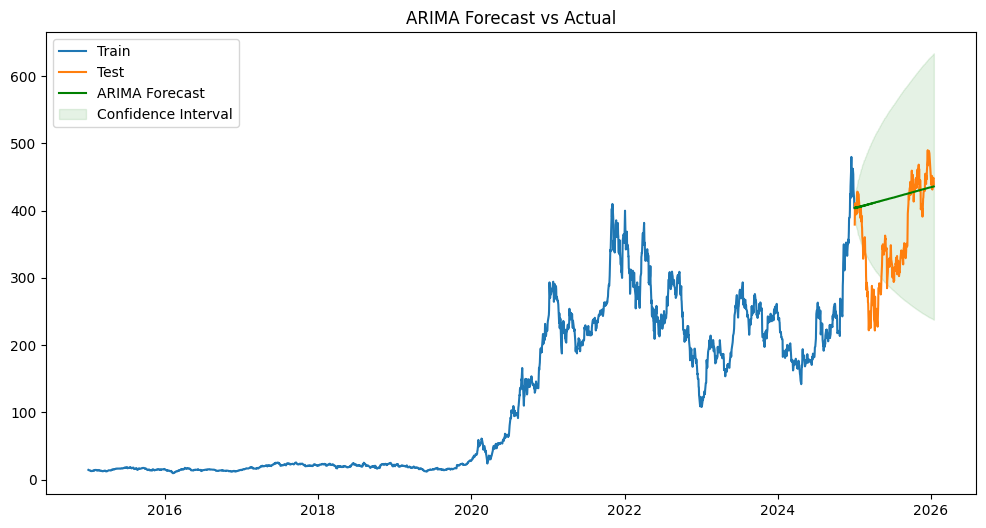

ARIMA Metrics: {'MAE': 69.99384090985889, 'RMSE': np.float64(88.3473495066011), 'MAPE': np.float64(23.382749461483225)}


In [3]:
# Forecast and Evaluate
forecast_series, conf_int_df, arima_metrics = models.forecast_and_evaluate(model_fit, test)

# Plot
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_series, label='ARIMA Forecast', color='green')
plt.fill_between(conf_int_df.index, 
                 conf_int_df.iloc[:, 0], 
                 conf_int_df.iloc[:, 1], 
                 color='green', alpha=0.1, label='Confidence Interval')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()

print("ARIMA Metrics:", arima_metrics)

## 2. Trend Analysis & Market Opportunities

### Trend Analysis
- **Direction**: (Analyze the plot above - likely flat or trending based on `d` parameter)
- **Volatility**: Inspect the width of the confidence intervals. Widening intervals indicate increasing uncertainty.

### Market Opportunities and Risks
- **Opportunity**: Buying if the lower bound of the CI suggests a floor above current levels (unlikely in stocks) or if the trend is strongly positive.
- **Risk**: The cone of uncertainty usually widens significantly, indicating high risk for long-term holding based purely on this forecast.
